# Project Part 1

[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/CooperDavis00/CS39AA-Project/blob/main/notebook62d0d44238.ipynb)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github.com/CooperDavis00/CS39AA-Project/blob/main/notebook62d0d44238.ipynb)

## 1. Introduction/Background

For my project I will be using a couple different song datasets that contain the song title, the artist, and the genre of the song. I will also be creating my own dataset with my personal spotify data of liked songs. This personal dataset will have the same parameters along with a parameter that will say 1 or 0 if I like the song or do not. All in all, I am using song data to predict if I would like a song based on my own liked songs, and the model will use binary classification to predict if I like the song or not. 

here are links to the datasets I plan to use, one will be used for predictions but I am testing out a few different ones. 


1.  https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset

2. https://www.kaggle.com/datasets/byomokeshsenapati/spotify-song-attributes

3. https://www.kaggle.com/datasets/undefinenull/million-song-dataset-spotify-lastfm 

## 2. Exploratory Data Analysis

for part 1 of my project I will be using this dataset: https://www.kaggle.com/datasets/byomokeshsenapati/spotify-song-attributes

In the future I will be using a more refined dataset with more entries, this one has about 4600 so it is a good start for now. 


In [1]:
# import all of the python modules/packages you'll need here
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
# ...

At first i wasnted to use the spotify api to generate a dataset of say 1000+ songs pulled with random genres. This proved to be a large issue because of the rate limiter for the spotify api, it made it so i could not request more than 50 songs at a time so instead I used a different dataset. Here is the dataset found from kaggle linked above. Here i read it into a file and format it so the only values displayed are trackName, artistName, and genre. Then I add a like column populated with all zeros since these are the songs i will be predicting and they start with not liked. 

In [2]:
song_data = '/kaggle/input/spotify-song-attributes/Spotify_Song_Attributes.csv'
df = pd.read_csv('https://raw.githubusercontent.com/CooperDavis00/CS39AA-Project/main/Spotify_Song_Attributes.csv')
df = df.drop(['msPlayed', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms'], axis=1)
df['like'] = 0
df = df.dropna(subset=['genre'])
df.head()

,trackName,artistName,genre,like
1,"""In The Hall Of The Mountain King"" from Peer G...",London Symphony Orchestra,british orchestra,0
2,#BrooklynBloodPop!,SyKo,glitchcore,0
3,$10,Good Morning,experimental pop,0
4,(I Just) Died In Your Arms,Cutting Crew,album rock,0
5,(L)only Child,salem ilese,alt z,0


Here is my dataset generated from my own spotify playlist with the same columns and i added a like column populated with ones. To get this playlist i used a third party application called exportify to get a csv file. The only unfortunate thing about this dataset was that it did not include genre for each song. To solve this issue I used the spotify API to search each song by the Track URI or the Track ID, then pull the genre(s) related to that song and add that to a column. This did solve the problem 


In [3]:
liked_song_data = '/kaggle/input/liked-spotify-songs/liked_songs_with_genre.csv'
df1 = pd.read_csv('https://raw.githubusercontent.com/CooperDavis00/CS39AA-Project/main/liked_songs_with_genre.csv')
df1['like'] = 1
df1.head()

,Track Name,Artist Name(s),Genre,like
0,Gamesofluck,Parcels,"aussietronica, indie soul",1
1,So Much In Love - Armin van Buuren Remix,"D.O.D, Armin van Buuren","electro house, house, pop dance, uk dance, dut...",1
2,Envious - Rezident Remix,"Aluna, Rezident","dance pop, german house",1
3,Change Your Mind,Interupt,bassline,1
4,Isolate,D.O.D,"electro house, house, pop dance, uk dance",1


I am counting the different genres and the amount of times each one is displayed. I then display a graph with the top 15 genres and an other category. 

Summary of Genre Information:
count          481
unique         393
top       N/A, N/A
freq            23
Name: Genre, dtype: object


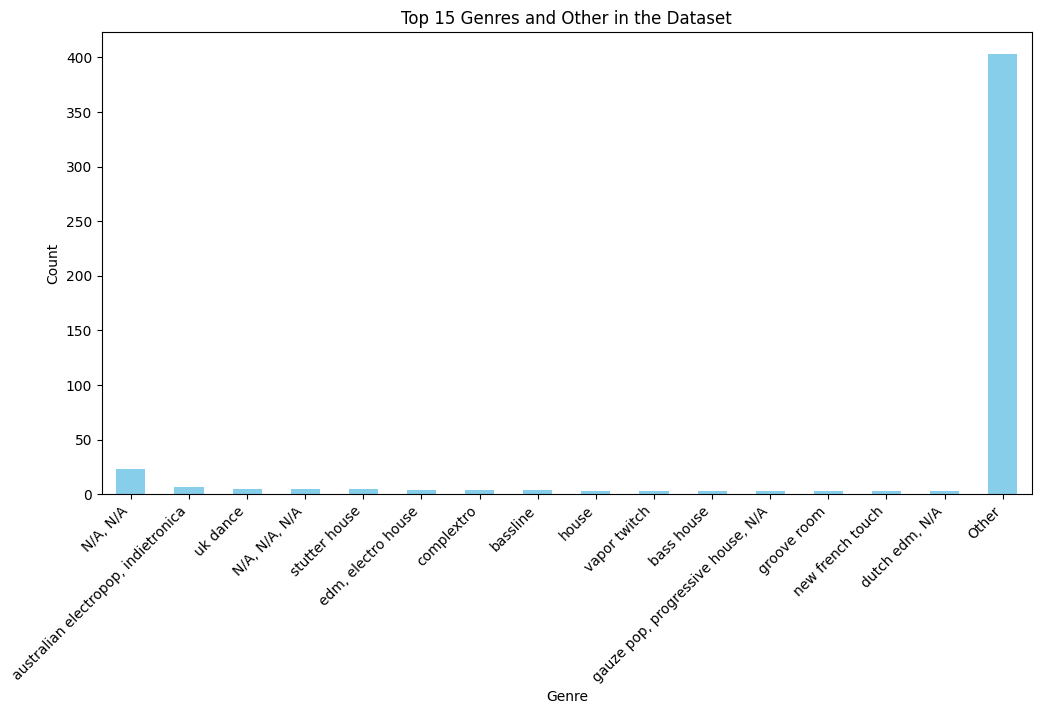

In [4]:
combined_df = pd.concat([df1, df], ignore_index=True)

# Display the count of each genre in the dataset
genre_counts = combined_df['Genre'].value_counts()

genre_description = combined_df['Genre'].describe()

print("Summary of Genre Information:")
print(genre_description)


# Keep the top 15 genres, and group the rest as "Other"
top_genres = genre_counts.head(15)
other_genres_count = genre_counts[15:].sum()

# Add "Other" to the top genres
top_genres['Other'] = other_genres_count

# Plot a bar chart
plt.figure(figsize=(12, 6))
top_genres.plot(kind='bar', color='skyblue')
plt.title('Top 15 Genres and Other in the Dataset')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In this cell i am setting up my variable and training with the logisticRegression model. Then I display the shape and initial accuracy. 


In [5]:
# Assuming 'Genre' is the only feature for simplicity
X = combined_df['Genre'].copy()
y = combined_df['like'].copy()

# Split the data into training and testing sets
X_train_raw, X_val_raw, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=21)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Transform the training and validation sets
X_train = tfidf_vectorizer.fit_transform(X_train_raw.values.astype('U')).toarray()
X_val = tfidf_vectorizer.transform(X_val_raw.values.astype('U')).toarray()

print(f"X_train.shape = {X_train.shape}")
print(f"X_val.shape = {X_val.shape}")

# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training data (liked songs)
model.fit(X_train, y_train)

# Make predictions on the additional songs dataset
y_pred = model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
classification_report_str = classification_report(y_val, y_pred)

print(f"Model Accuracy: {accuracy}")
print("Classification Report:\n", classification_report_str)

X_train.shape = (7291, 200)
X_val.shape = (1823, 200)
Model Accuracy: 0.9972572682391662
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1716
           1       1.00      0.95      0.98       107

    accuracy                           1.00      1823
   macro avg       1.00      0.98      0.99      1823
weighted avg       1.00      1.00      1.00      1823



testing the accuracy of the model. 

accuracy (on y_train): 0.9934


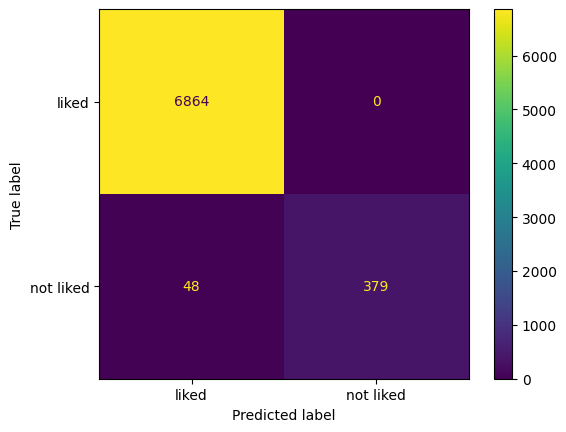

In [6]:
model = LogisticRegression()
model = model.fit(X_train, y_train)

predictions_train = model.predict(X_train)

disp = ConfusionMatrixDisplay(confusion_matrix(y_train, predictions_train), display_labels=['liked', 'not liked'])
disp.plot()
print(f"accuracy (on y_train): {accuracy_score(y_train, predictions_train):.4f}")

accuracy (on y_val): 0.9973


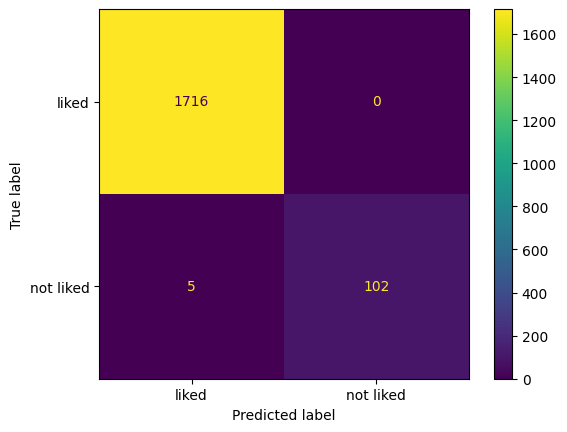

In [7]:
predictions_val = model.predict(X_val)
disp = ConfusionMatrixDisplay(confusion_matrix(y_val, predictions_val), display_labels=['liked', 'not liked'])
disp.plot()
print(f"accuracy (on y_val): {accuracy_score(y_val, predictions_val):.4f}")